<a href="https://colab.research.google.com/github/KarinImitola/ProyectoDeep/blob/main/01_Depuraci%C3%B3n_de_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
! pip install Pillow
from PIL import Image
! pip install -q kaggle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import *
#from local.lib import mlutils
from IPython.display import Image
from skimage import io
tf.__version__

'2.14.0'

##Lectura de datos##

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jorgecastrillono","key":"13709d73c0a4e096bd2d8c1e8f7d4f74"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d siddharthkumarsah/plastic-bottles-image-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
plastic-bottles-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
#Descomprimir base de datos
with zipfile.ZipFile('plastic-bottles-image-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('BD')


In [ ]:
import shutil

# Ruta de la carpeta a eliminar
#ruta_a_eliminar = '/content/BD'

# Eliminar la carpeta y su contenido
#shutil.rmtree(ruta_a_eliminar)

In [ ]:
import os
import shutil

# Ruta actual de la carpeta
ruta_actual = '/content/BD/Plastic Bottle Image Dataset'

# Nuevo nombre para la carpeta
nuevo_nombre = '/content/BD/PlasticBottleImageDataset'

# Cambiar el nombre de la carpeta
shutil.move(ruta_actual, nuevo_nombre)

'/content/BD/PlasticBottleImageDataset'

In [ ]:
import os

# Definición de carpetas de imágenes y etiquetas
image_folder = 'BD/PlasticBottleImageDataset/train/images'
label_folder = 'BD/PlasticBottleImageDataset/train/labels'

# Obtención de listas de nombres de archivos ordenados
image_files = sorted(os.listdir(image_folder))
label_files = sorted(os.listdir(label_folder))

# Iteración a través de las carpetas de imágenes y etiquetas
for i, (image_filename, label_filename) in enumerate(zip(image_files, label_files)):
    # Renombrar archivos de imágenes
    # crear nuevo nombre
    new_name = f'{i + 1}Imagen.jpg'

    old_image_path = os.path.join(image_folder, image_filename)
    new_image_path = os.path.join(image_folder, new_name)

    # renombrar imagen
    os.rename(old_image_path, new_image_path)

    # Get the full paths of the old and new names for labels
    old_label_path = os.path.join(label_folder, label_filename)
    new_label_path = os.path.join(label_folder, new_name.replace('.jpg', '.txt'))

    # Renombrar archivos de etiquetas (si existen)
    if os.path.exists(old_label_path):
        os.rename(old_label_path, new_label_path)


In [ ]:
archivos_en_BD = os.listdir('BD/PlasticBottleImageDataset/train/images')
archivos_en_BD
#archivos_en_BD1 = os.listdir('BD/PlasticBottleImageDataset/train/labels')
#archivos_en_BD1

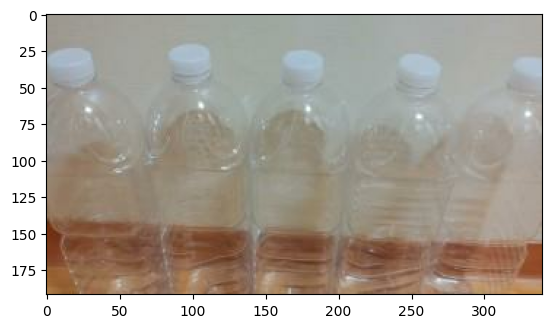

In [ ]:
import tensorflow as tf

# Carga una imagen de muestra
imagen_path = '/content/BD/PlasticBottleImageDataset/train/images/1Imagen.jpg'
imagen = tf.io.read_file(imagen_path)
imagen = tf.image.decode_jpeg(imagen, channels=3)

# Muestra la imagen
plt.imshow(imagen.numpy())
plt.show()


In [ ]:
import os

# Define los subdirectorios a explorar
subdirectorios = ['valid', 'train', 'test']

# Itera sobre los subdirectorios
for subdirectorio in subdirectorios:
    ruta_subdirectorio = os.path.join('BD/Plastic Bottle Image Dataset', subdirectorio)
    archivos_en_subdirectorio = os.listdir(ruta_subdirectorio)
    print(f"Elementos en el subdirectorio '{subdirectorio}':")
    for elemento in archivos_en_subdirectorio:
        print(f"- {elemento}")

Elementos en el subdirectorio 'valid':
- labels.cache
- labels
- images
Elementos en el subdirectorio 'train':
- labels.cache
- labels
- images
Elementos en el subdirectorio 'test':
- labels
- images


In [ ]:
# Verifica la presencia de imágenes y etiquetas en un subdirectorio específico (por ejemplo, 'train')
ruta_imagenes = os.path.join('BD/Plastic Bottle Image Dataset/train/images')
ruta_etiquetas = os.path.join('BD/Plastic Bottle Image Dataset/train/labels')

archivos_imagenes = os.listdir(ruta_imagenes)
archivos_etiquetas = os.listdir(ruta_etiquetas)

print(f"Archivos de imágenes en 'train': {archivos_imagenes}")
print(f"Archivos de etiquetas en 'train': {archivos_etiquetas}")


Archivos de imágenes en 'train': ['plastic_bottle-20_jpg.rf.b897250bc12e970c84190efa6aca9d96.jpg', '3_jpg.rf.a7a3039580483575e8ddb162d8223516.jpg', 'JPEG-image-522_jpeg.rf.2d92b78f1c9d4922cf76cb72ec86bed9.jpg', '300256_jpg.rf.30d4b28dc905bc35d9d8c1680d4dadc6.jpg', 'WhatsApp-Image-2022-12-24-at-00-44-20_jpeg.rf.02f76dd26d82d5eece903c5a96edc449.jpg', 'plastic_bottle-131_jpg.rf.d330c7a8c61546494ea68873311cd036.jpg', 'WIN_20221224_00_48_57_Pro_jpg.rf.b80609ded5a39f663b0353329ff9727c.jpg', '9-99129_water-bottle-clipart-png_png.rf.cde0f4141df861278a314c1076de4f74.jpg', '29_jpg.rf.629569ec9dbec56045ab0157cb491319.jpg', '6_jpg.rf.baec8ddb7eb4ef514aa5d73c9891ede7.jpg', 'WhatsApp-Image-2022-12-24-at-00-35-17-1-_jpeg.rf.534922c077559cbeaa0de54e43bb03f7.jpg', '1_jpg.rf.125edd0f20daf8577a258320b13b9bc2.jpg', '200007_jpg.rf.893bfe97ef837dddd01740ea41f7af47.jpg', 'z1014_104_11zon_jpg.rf.223de6384105d1023df9fdbb75825232.jpg', 'plastic_bottle-128_jpg.rf.32a27e4b03e9f2f5fc4e1976a31fed6f.jpg', '200332_jp

In [ ]:
# Lee el contenido de un archivo de etiquetas específico (por ejemplo, '000001_jpg.rf.a2db17fe3becba39f268ef981a3edb84.txt')
ruta_etiqueta = os.path.join('BD/Plastic Bottle Image Dataset/train/labels', '1_jpg.rf.6e512421ff1d5df4eaabae89211d1409.txt')

with open(ruta_etiqueta, 'r') as archivo_etiqueta:
    contenido_etiqueta = archivo_etiqueta.readlines()

print(f"Contenido de la etiqueta:\n{contenido_etiqueta}")


Contenido de la etiqueta:
['0 0.5333806818181818 0.5033783783783784 0.9076704545454546 0.9932432432432432']


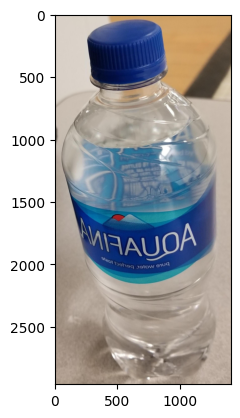

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
# Ruta de la imagen
ruta_imagen = os.path.join('BD/Plastic Bottle Image Dataset/train/images', '1_jpg.rf.6e512421ff1d5df4eaabae89211d1409.jpg')

# Carga y muestra la imagen
imagen = Image.open(ruta_imagen)
# Carga y muestra la imagen
imagen = Image.open(ruta_imagen)
plt.imshow(imagen)
plt.show()

In [ ]:
# Obtener las dimensiones de una imagen específica
dimensiones = imagen.size
print(f"Dimensiones de la imagen: {dimensiones}")


Dimensiones de la imagen: (1408, 2960)


In [ ]:
# Ruta de la imagen
ruta_imagen = os.path.join('BD/Plastic Bottle Image Dataset/train/images_redimensionadas', '1_jpg.rf.6e512421ff1d5df4eaabae89211d1409.jpg')

# Carga y muestra la imagen
imagen = Image.open(ruta_imagen)
# Obtener las dimensiones de una imagen específica
dimensiones = imagen.size
print(f"Dimensiones de la imagen: {dimensiones}")

In [ ]:

###import os

from PIL import Image
def verificar_etiquetas(ruta_archivo):
    with open(ruta_archivo, 'r') as archivo:
        lineas = archivo.readlines()
        for linea in lineas:
            valores = linea.strip().split()
            for i in range(1, len(valores)):  # Ignora el primer valor (que es el identificador de la clase)
                valor = float(valores[i])
                if valor < 0 or valor > 1:
                    return False
    return True

# Define el tamaño común
nuevo_tamano = (416, 416)

# Define los subdirectorios a explorar
subdirectorios = ['valid', 'train', 'test']

for subdirectorio in subdirectorios:
    ruta_subdirectorio = os.path.join('BD/Plastic Bottle Image Dataset', subdirectorio)
    carpeta_imagenes = os.path.join(ruta_subdirectorio, 'images')
    carpeta_labels = os.path.join(ruta_subdirectorio, 'labels')

    # Crea un directorio para almacenar las imágenes redimensionadas
    carpeta_redimensionadas = os.path.join(ruta_subdirectorio, 'images_redimensionadas')
    os.makedirs(carpeta_redimensionadas, exist_ok=True)

    # Itera sobre las imágenes
    for nombre_imagen in os.listdir(carpeta_imagenes):
        ruta_imagen_original = os.path.join(carpeta_imagenes, nombre_imagen)

        # Carga y redimensiona la imagen
        imagen = Image.open(ruta_imagen_original)
        imagen_redimensionada = imagen.resize(nuevo_tamano)

        # Guarda la imagen redimensionada en la carpeta correspondiente
        ruta_imagen_redimensionada = os.path.join(carpeta_redimensionadas, nombre_imagen)
        imagen_redimensionada.save(ruta_imagen_redimensionada)

    # Verificar las etiquetas
    for nombre_archivo_label in os.listdir(carpeta_labels):
        ruta_archivo_label = os.path.join(carpeta_labels, nombre_archivo_label)
        etiqueta_es_normalizada = verificar_etiquetas(ruta_archivo_label)

        if etiqueta_es_normalizada:
            1 + 1
            #print(f"Todas las etiquetas en {nombre_archivo_label} están normalizadas.")
        else:
            print(f"Hay al menos una etiqueta en {nombre_archivo_label} que no está normalizada.")

# Verifica si las imágenes se han redimensionado correctamente
os.listdir('BD/Plastic Bottle Image Dataset')


Hay al menos una etiqueta en 0218091738_jpg.rf.ccfd3bf538170831da267c370279c615.txt que no está normalizada.
Hay al menos una etiqueta en 0218091807_jpg.rf.895fef326cb25f1a2dca0d7f0a28df0a.txt que no está normalizada.
Hay al menos una etiqueta en 0218091658_jpg.rf.29db340a9f7cb89498a89f0564da33de.txt que no está normalizada.
Hay al menos una etiqueta en water-bottles_jpg.rf.7f2cf644e7b419c297daade95476a192.txt que no está normalizada.
Hay al menos una etiqueta en Edited_7283263_NPL_700mL_FR_png.rf.23bb6464bbb80913af962325315cb869.txt que no está normalizada.
Hay al menos una etiqueta en image_png.rf.1a276c55e373ab8b9f54b8edc3ef2b1d.txt que no está normalizada.
Hay al menos una etiqueta en kjhlkklu_png.rf.a782c10092282ef6bbb400bc6bfd2c60.txt que no está normalizada.
Hay al menos una etiqueta en 0224022428_jpg.rf.d76bd38f749ce831bdf67f960d6c22b5.txt que no está normalizada.
Hay al menos una etiqueta en WhatsApp-Image-2022-08-09-at-12-56-18_jpeg.rf.13a35fb6edf60eddd03166f9d4eca8f2.txt que

['test', 'train', 'data.yaml', 'valid']

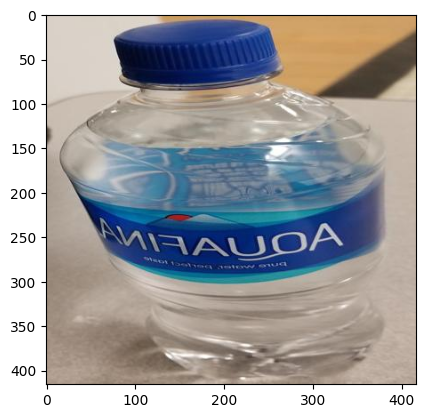

In [ ]:
from matplotlib import pyplot as plt

# Carga y muestra la imagen
imagen = Image.open(ruta_imagen)
plt.imshow(imagen)
plt.show()

In [ ]:
import os

# Define el tamaño común
nuevo_tamano = (416, 416)

# Define los subdirectorios a explorar
subdirectorios = ['valid', 'train', 'test']

# Lista de nombres de archivos a eliminar
archivos_a_eliminar = [
    "0218091658_jpg.rf.29db340a9f7cb89498a89f0564da33de.txt",
    "0218091738_jpg.rf.ccfd3bf538170831da267c370279c615.txt",
    "0218091807_jpg.rf.895fef326cb25f1a2dca0d7f0a28df0a.txt",
    "kjhlkklu_png.rf.a782c10092282ef6bbb400bc6bfd2c60.txt",
    "WhatsApp-Image-2022-08-09-at-12-56-18_jpeg.rf.13a35fb6edf60eddd03166f9d4eca8f2.txt",
    "water-bottles_jpg.rf.7f2cf644e7b419c297daade95476a192.txt",
    "image_png.rf.1a276c55e373ab8b9f54b8edc3ef2b1d.txt",
    "Edited_7283263_NPL_700mL_FR_png.rf.23bb6464bbb80913af962325315cb869.txt",
    "0224022428_jpg.rf.d76bd38f749ce831bdf67f960d6c22b5.txt"
]

# Itera sobre los subdirectorios
for subdirectorio in subdirectorios:
    # Rutas de las carpetas
    ruta_subdirectorio = os.path.join('BD/Plastic Bottle Image Dataset', subdirectorio)
    carpeta_imagenes = os.path.join(ruta_subdirectorio, 'images')
    carpeta_redimensionadas = os.path.join(ruta_subdirectorio, 'images_redimensionadas')
    carpeta_labels = os.path.join(ruta_subdirectorio, 'labels')

    # Itera sobre los archivos a eliminar
    for archivo in archivos_a_eliminar:
        # Eliminar etiquetas
        ruta_etiqueta = os.path.join(carpeta_labels, archivo)
        if os.path.exists(ruta_etiqueta):
            os.remove(ruta_etiqueta)
            print(f"Se ha eliminado {archivo} en {subdirectorio}/labels")
        #else:
            #print(f"El archivo {archivo} no existe en {subdirectorio}/labels")

        # Eliminar imágenes redimensionadas
        ruta_imagen_redimensionada = os.path.join(carpeta_redimensionadas, archivo.replace('.txt', '.jpg'))
        if os.path.exists(ruta_imagen_redimensionada):
            os.remove(ruta_imagen_redimensionada)
            print(f"Se ha eliminado {archivo.replace('.txt', '.jpg')} en {subdirectorio}/images_redimensionadas")
        #else:
            #print(f"El archivo {archivo.replace('.txt', '.jpg')} no existe en {subdirectorio}/images_redimensionadas")


Se ha eliminado 0218091658_jpg.rf.29db340a9f7cb89498a89f0564da33de.txt en valid/labels
Se ha eliminado 0218091658_jpg.rf.29db340a9f7cb89498a89f0564da33de.jpg en valid/images_redimensionadas
Se ha eliminado 0218091738_jpg.rf.ccfd3bf538170831da267c370279c615.txt en valid/labels
Se ha eliminado 0218091738_jpg.rf.ccfd3bf538170831da267c370279c615.jpg en valid/images_redimensionadas
Se ha eliminado 0218091807_jpg.rf.895fef326cb25f1a2dca0d7f0a28df0a.txt en valid/labels
Se ha eliminado 0218091807_jpg.rf.895fef326cb25f1a2dca0d7f0a28df0a.jpg en valid/images_redimensionadas
Se ha eliminado kjhlkklu_png.rf.a782c10092282ef6bbb400bc6bfd2c60.txt en train/labels
Se ha eliminado kjhlkklu_png.rf.a782c10092282ef6bbb400bc6bfd2c60.jpg en train/images_redimensionadas
Se ha eliminado WhatsApp-Image-2022-08-09-at-12-56-18_jpeg.rf.13a35fb6edf60eddd03166f9d4eca8f2.txt en train/labels
Se ha eliminado WhatsApp-Image-2022-08-09-at-12-56-18_jpeg.rf.13a35fb6edf60eddd03166f9d4eca8f2.jpg en train/images_redimensionada